In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("artermiloff/steam-games-dataset")

print("Path to dataset files:", path)

C:\Users\Win 10\Documents\GitHub\recommender-system-for-videogames\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Win 10\.cache\kagglehub\datasets\artermiloff\steam-games-dataset\versions\2


In [2]:
import pandas as pd

In [3]:
games = pd.read_csv(f"{path}/games_march2025_cleaned.csv")

In [4]:
games

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,682,2434,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89613,2115110,Outrun Them,2024-02-29,0,3.99,0,The name of the game is literally the game. Ou...,The name of the game is literally the game. Ou...,It's all in the name.. outrun them.,NaN,...,0,0,0,0,0,"{'2D Platformer': 91, 'Runner': 85, 'Platforme...",-1,-1,-1,-1
89614,1174200,Lands of Pharaoh: Episode 1,2020-01-07,0,10.00,0,Join Our Discord Channel About the Game Briefl...,Briefly: Lands of Pharaoh is a third person vi...,Lands of Pharaoh is a multi-camera-angle based...,NaN,...,0,0,0,0,0,"{'Action': 43, 'Adventure': 41, 'Indie': 41, '...",-1,-1,-1,-1
89615,1160190,Player One,2019-10-10,0,1.99,0,Player One is a new 3D game where you take con...,Player One is a new 3D game where you take con...,"3D Game, Thirdperson Platformer",NaN,...,0,0,0,0,0,"{'Indie': 31, 'Early Access': 21}",-1,-1,-1,-1
89616,3380340,DragonRoad,2025-01-25,0,29.99,0,"This is an open world game on 3D, also a m...","This is an open world game on 3D, also a m...","This is an open world game on 3D, Also a missi...",NaN,...,0,0,0,0,0,"{'RPG': 117, 'Action-Adventure': 111, 'Strateg...",-1,-1,-1,-1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

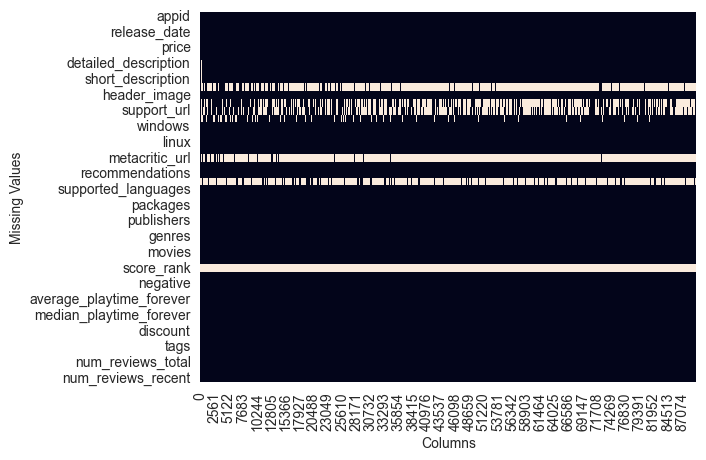

In [6]:
ax = plt.axes()
sns.heatmap(games.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

In [7]:
import ast

# funzione per estrarre solo i tag (chiavi del dizionario)
def extract_tags(tag_dict):
    if isinstance(tag_dict, str):
        try:
            tag_dict = ast.literal_eval(tag_dict)  # converte la stringa in dict
        except:
            return ""
    if isinstance(tag_dict, dict):
        return " ".join(tag_dict.keys())
    return ""

# nuova colonna con i tags testuali
games["tags_text"] = games["tags"].apply(extract_tags)

# nuova colonna con descrizione + tags
games["tagged_description"] = (
    games["short_description"].fillna("") + " " + games["tags_text"]
)

# metto appid come indice (non dentro la stringa)
games = games.set_index("appid")

# salvo il CSV pulito
games.to_csv("games_cleaned.csv", index=True)


In [8]:
games

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,tags_text,tagged_description
appid,,,,,,,,,,,,,,,,,,,,,
730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://shared.akamai.steamstatic.com/store_it...,...,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473,FPS Shooter Multiplayer Competitive Action Tea...,"For over two decades, Counter-Strike has offer..."
578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://shared.akamai.steamstatic.com/store_it...,...,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720,Survival Shooter Battle Royale Multiplayer FPS...,Play PUBG: BATTLEGROUNDS for free. Land on str...
570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://shared.akamai.steamstatic.com/store_it...,...,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366,Free to Play MOBA Multiplayer Strategy e-sport...,"Every day, millions of players worldwide enter..."
271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,...,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517,Open World Action Multiplayer Crime Automobile...,Grand Theft Auto V for PC offers players the o...
359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,https://shared.akamai.steamstatic.com/store_it...,...,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608,FPS PvP e-sports Multiplayer Tactical Shooter ...,"Tom Clancy's Rainbow Six® Siege is an elite, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115110,Outrun Them,2024-02-29,0,3.99,0,The name of the game is literally the game. Ou...,The name of the game is literally the game. Ou...,It's all in the name.. outrun them.,NaN,https://shared.akamai.steamstatic.com/store_it...,...,0,0,0,"{'2D Platformer': 91, 'Runner': 85, 'Platforme...",-1,-1,-1,-1,2D Platformer Runner Platformer 2D Top-Down Ca...,It's all in the name.. outrun them. 2D Platfor...
1174200,Lands of Pharaoh: Episode 1,2020-01-07,0,10.00,0,Join Our Discord Channel About the Game Briefl...,Briefly: Lands of Pharaoh is a third person vi...,Lands of Pharaoh is a multi-camera-angle based...,NaN,https://shared.akamai.steamstatic.com/store_it...,...,0,0,0,"{'Action': 43, 'Adventure': 41, 'Indie': 41, '...",-1,-1,-1,-1,Action Adventure Indie Strategy,Lands of Pharaoh is a multi-camera-angle based...
1160190,Player One,2019-10-10,0,1.99,0,Player One is a new 3D game where you take con...,Player One is a new 3D game where you take con...,"3D Game, Thirdperson Platformer",NaN,https://shared.akamai.steamstatic.com/store_it...,...,0,0,0,"{'Indie': 31, 'Early Access': 21}",-1,-1,-1,-1,Indie Early Access,"3D Game, Thirdperson Platformer Indie Early Ac..."
